# Example of how to compare frequency terms between two lexicons


Data can be downloaded from: https://data.nls.uk/data/digitised-collections/chapbooks-printed-in-scotland/


### Loading the necessary libraries

In [121]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd 
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
NON_AZ_REGEXP = re.compile('[^a-z]')

In [122]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200

### Functions

In [123]:
def normalize(word):
    """
    Normalize a word by converting it to lower-case and removing all
    characters that are not 'a',...,'z'.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    return re.sub(NON_AZ_REGEXP, '', word.lower())

In [124]:
def freq_count(results):
    freq_count={}
    for year in results:
        if year!= None:
            for i in results[year]:
                if i[0] not in freq_count:
                    freq_count[i[0]]={}
                    freq_count[i[0]][year]=i[1]
                
                else:
                    if year not in freq_count[i[0]]:
                        freq_count[i[0]][year]=i[1]
                    else:    
                        freq_count[i[0]][year]+=i[1]
    return freq_count

In [125]:
def read_query_results(filename):
    with open('./results_ChapBooks/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [126]:
def plot_terms(df, term1, term2):
    ax = plt.gca()
    df.plot(kind='line', y=term1, ax=ax)
    df.plot(kind='line', y=term2, color='red', ax=ax)
    plt.show()

### LEXICONS TO COMPARE

**ENGLISH LEXICON**: 
much, kale, pony, silver, devil, know, an, off, blew, who, must, good, judge, security, is, no, curate, building, justice, more, what, hive, harry, old, go, went, one, secured, some, cold, would, more, from, when, done, much, book, called, work, away, long, own, down, sticking, bide, which, when, power, obtain, leisure, now, beg, complementing, flour, goes, Lord, leisure, where, new, next, somewhat, complained, well, diseases, speciallityes, speciallity, flows, cleaning, whatever, allow, contained, these, scare, news, vacation, through, more, atteine, to, renewing, depth, duty, reign, third, names, name, barricade, refer, thatch, kept, lords, lord, Schireff, kept, wrote, wrote, necessary, altogether, together, write, cloak bag, wrote, forfeit, forfeiting, plaster, allyance, entirely, entire, those, Saturday, meeting, parties, entire, subscribed, presecution, subscribe, gard, gards, Lieutenant, part, parted, like, case, summe, evade, evaded, declare, declare, debate, preventing, prevent, complaining, complain, maintain, deal, whatsomever, partners, partner, write, party, plausible, trade, regard, shore, ashore, Treasury, writing, whereas, captain, writes, never, nineteenth, garde, gardes, well, necessary, unnecessary, engaged, engage, enough, lately, affect, Treasury, grieve, grieved, present, Grace, guard, Highlander, Highland, blessed, hinder, hinders, presume, many, well, change, changeableness, exhausted, prejudice, changes, hindered, preside, case, glad, deal, unanimously, necessitate, deal, quite, claim, farmers, approved, whereby, choose, tomorrow, Treasury, estate, carrying, estates, entertainment, entertain, entertainments, new, due, haste, spare, deal, same, learn, safe, safe, quarrelling, repulse, very, hasty, thirteen, sword, dated, date, votes, vote, Estates, meet, relate, relates , ordinary, either, July, obtaining, obtained, obtain, acquaint, June, June, her, continuance, continue, some, likewise, continued, discharge, can, contrary, debate, parting, party, subscribe, subscribes, Justiciary, lawyer, prolongation, poor, narrowly, likewise, well


 **SCOTS LEXICON**:

muckle, kail, powny, siller, de'il, ken, ane, aff, blaw, wha, maun, guid, jeedge, sekeerity, beis, nae, keerate, bigging, jeestice, mair, fat, beik, herry, auld, anent, gae, gaet, ae, sekeered, sume, cald, wad, mae, frae, fan, deen, meikle, buik, ca'd, bra', wark, awa', lang, oun, doun, stieking, byde, quhich, quhen, pouer, obtean, laizoure, nou, begg, complementare, flouer, goand, laird, laizour, quher, neu, nixt, somquhat, compleand, weel, deseases, specialityes, specialitye, floues, cleanging, quhatever, allou, conteaned, thir, scarr, neuse, vacance, throu, moe, attean, tye, reneuing, deepth, deuty, reinge, thrid, vocables, vocable, barrous, refeir, theick, keept, lairds, laird, Shirriff, demitt, keep’t, writt, wrott, necessar , alltogather, to gather, wrot, clog bag, tost, wrot, dimitt, forfault, forfaulting, plaisture, treater, treaters, allayance, intierlie, intier, thos, Saturnday, sederunt, pairties, intire, subscryved, prosecutione, subscryve, guaird, guairds, Lewtennant, pairt, pairted, lyke, caise, macer, macers, sowme, evite, evited, declairing, declair, debeat, praeventing, praevent, compleang, complean, mantain, dail, quhatsomever, pairtners, pairtner, wreat, pairtie, plausabile, tread, regaird, treatters, shoar, ashoar, Thesaury, wreating, qhereas, Captane, reponed, repone, wreats, neaver, nynteinth, guaird, guairds, judiccatories, judicatory, weal, necessaire, unecessaire, ingadged , ingadge, aneugh, laitlie, praejudge, Thrasurie, grive, grived, praesant, Greace, gaird, Hylander, Hyland, blist, hender, henders, praesum, brok, mainie, weal, cheange, cheangablness, exhousted, praejudice, cheanges, hendred, praeside, caice, glaid, lou, praelimiting, dail, unanimuslie, prelimitation, prelimit, necessitat , adoeing, dale, rexive, quytt, clame, ffermers, approwen, quhereby, choise, to morou, Thraesurie, esteat, cariing , esteats, interteanment, intertean, interteanments, niu, diu, haist, spair, daile, saime, larne, saife, saif, cabaling, repulls, verrie, haisty, therteen, suord, daited, dait, vottes, votte, Estaites, miet, relaite, relaites, ordinar, ether, Jully, commissariat, obteaning, obteaned, obteane, acquent, Juin, Juine, hir, continowance, continow, sume, lykewayes, continow, dischairge, cane, contraire, debait, pairting, pairty, subscrive, subscrives, Justiciorie, lauer, prorogation, poure, naruly, lykways, weell
    

### 1. Normalize all the terms per lexicon

In [127]:
english_lexicon_string='much, kale, pony, silver, devil, know, an, off, blew, who, must, good, judge, security, is, no, curate, building, justice, more, what, hive, harry, old, go, went, one, secured, some, cold, would, more, from, when, done, much, book, called, work, away, long, own, down, sticking, bide, which, when, power, obtain, leisure, now, beg, complementing, flour, goes, Lord, leisure, where, new, next, somewhat, complained, well, diseases, speciallityes, speciallity, flows, cleaning, whatever, allow, contained, these, scare, news, vacation, through, more, atteine, to, renewing, depth, duty, reign, third, names, name, barricade, refer, thatch, kept, lords, lord, Schireff, kept, wrote, wrote, necessary, altogether, together, write, cloak bag, wrote, forfeit, forfeiting, plaster, allyance, entirely, entire, those, Saturday, meeting, parties, entire, subscribed, presecution, subscribe, gard, gards, Lieutenant, part, parted, like, case, summe, evade, evaded, declare, declare, debate, preventing, prevent, complaining, complain, maintain, deal, whatsomever, partners, partner, write, party, plausible, trade, regard, shore, ashore, Treasury, writing, whereas, captain, writes, never, nineteenth, garde, gardes, well, necessary, unnecessary, engaged, engage, enough, lately, affect, Treasury, grieve, grieved, present, Grace, guard, Highlander, Highland, blessed, hinder, hinders, presume, many, well, change, changeableness, exhausted, prejudice, changes, hindered, preside, case, glad, deal, unanimously, necessitate, deal, quite, claim, farmers, approved, whereby, choose, tomorrow, Treasury, estate, carrying, estates, entertainment, entertain, entertainments, new, due, haste, spare, deal, same, learn, safe, safe, quarrelling, repulse, very, hasty, thirteen, sword, dated, date, votes, vote, Estates, meet, relate, relates , ordinary, either, July, obtaining, obtained, obtain, acquaint, June, June, her, continuance, continue, some, likewise, continued, discharge, can, contrary, debate, parting, party, subscribe, subscribes, Justiciary, lawyer, prolongation, poor, narrowly, likewise, well'
english_lexicon= re.split('; |, |\*|\n',english_lexicon_string)
english_lexicon_norm=[]
for keysentence in english_lexicon:
    k_split = keysentence.split()
    sentence_word = [normalize(word) for word in k_split]
    sentence_norm = ''
    for word in sentence_word:
        if sentence_norm == '':
            sentence_norm = word
        else:
            sentence_norm += " " + word
    english_lexicon_norm.append(sentence_norm)

In [128]:
scots_lexicon_string='muckle, kail, powny, siller, deil, ken, ane, aff, blaw, wha, maun, guid, jeedge, sekeerity, beis, nae, keerate, bigging, jeestice, mair, fat, beik, herry, auld, anent, gae, gaet, ae, sekeered, sume, cald, wad, mae, frae, fan, deen, meikle, buik, cad, bra, wark, awa, lang, oun, doun, stieking, byde, quhich, quhen, pouer, obtean, laizoure, nou, begg, complementare, flouer, goand, laird, laizour, quher, neu, nixt, somquhat, compleand, weel, deseases, specialityes, specialitye, floues, cleanging, quhatever, allou, conteaned, thir, scarr, neuse, vacance, throu, moe, attean, tye, reneuing, deepth, deuty, reinge, thrid, vocables, vocable, barrous, refeir, theick, keept, lairds, laird, Shirriff, demitt, keep’t, writt, wrott, necessar , alltogather, to gather, wrot, clog bag, tost, wrot, dimitt, forfault, forfaulting, plaisture, treater, treaters, allayance, intierlie, intier, thos, Saturnday, sederunt, pairties, intire, subscryved, prosecutione, subscryve, guaird, guairds, Lewtennant, pairt, pairted, lyke, caise, macer, macers, sowme, evite, evited, declairing, declair, debeat, praeventing, praevent, compleang, complean, mantain, dail, quhatsomever, pairtners, pairtner, wreat, pairtie, plausabile, tread, regaird, treatters, shoar, ashoar, Thesaury, wreating, qhereas, Captane, reponed, repone, wreats, neaver, nynteinth, guaird, guairds, judiccatories, judicatory, weal, necessaire, unecessaire, ingadged , ingadge, aneugh, laitlie, praejudge, Thrasurie, grive, grived, praesant, Greace, gaird, Hylander, Hyland, blist, hender, henders, praesum, brok, mainie, weal, cheange, cheangablness, exhousted, praejudice, cheanges, hendred, praeside, caice, glaid, lou, praelimiting, dail, unanimuslie, prelimitation, prelimit, necessitat , adoeing, dale, rexive, quytt, clame, ffermers, approwen, quhereby, choise, to morou, Thraesurie, esteat, cariing , esteats, interteanment, intertean, interteanments, niu, diu, haist, spair, daile, saime, larne, saife, saif, cabaling, repulls, verrie, haisty, therteen, suord, daited, dait, vottes, votte, Estaites, miet, relaite, relaites, ordinar, ether, Jully, commissariat, obteaning, obteaned, obteane, acquent, Juin, Juine, hir, continowance, continow, sume, lykewayes, continow, dischairge, cane, contraire, debait, pairting, pairty, subscrive, subscrives, Justiciorie, lauer, prorogation, poure, naruly, lykways, weell'
scots_lexicon= re.split('; |, |\*|\n',scots_lexicon_string)
scots_lexicon_norm=[]
for keysentence in scots_lexicon:
    k_split = keysentence.split()
    sentence_word = [normalize(word) for word in k_split]
    sentence_norm = ''
    for word in sentence_word:
        if sentence_norm == '':
            sentence_norm = word
        else:
            sentence_norm += " " + word
    scots_lexicon_norm.append(sentence_norm)

### 2. Getting the Frequencies per Term and Per year

In [129]:
query_results_english=read_query_results('frequency_english_per_year_count_term')
query_results_scots=read_query_results('frequency_scots_per_year_count_term')
# frequency count per term using the english results
freq_count_norm_english=freq_count(query_results_english)
# frequency count per term using the scots results
freq_count_norm_scots=freq_count(query_results_scots)

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
freq_count_norm_english

{'called': {1792: 1,
  1793: 3,
  1794: 22,
  1795: 69,
  1796: 5,
  1797: 24,
  1798: 43,
  1799: 71,
  1800: 337,
  1801: 70,
  1802: 29,
  1803: 43,
  1804: 49,
  1805: 21,
  1806: 62,
  1807: 32,
  1808: 21,
  1809: 45,
  1810: 106,
  1811: 27,
  1812: 56,
  1813: 116,
  1814: 2,
  1815: 155,
  1816: 53,
  1817: 103,
  1818: 26,
  1819: 16,
  1820: 158,
  1821: 49,
  1822: 83,
  1823: 34,
  1824: 12,
  1825: 51,
  1826: 23,
  1827: 56,
  1828: 153,
  1829: 26,
  1830: 32,
  1831: 9,
  1832: 40,
  1835: 5,
  1836: 6,
  1837: 4,
  1838: 10,
  1839: 86,
  1840: 766,
  1841: 15,
  1842: 9,
  1843: 2,
  1844: 14,
  1845: 4,
  1846: 6,
  1847: 2,
  1850: 231,
  1851: 55,
  1852: 47,
  1853: 5,
  1855: 25,
  1856: 19,
  1857: 7,
  1858: 6,
  1868: 4,
  1870: 24,
  1875: 1,
  1880: 28,
  1881: 1,
  1885: 1,
  1893: 3,
  1681: 5,
  1704: 20,
  1715: 1,
  1718: 1,
  1719: 3,
  1720: 1,
  1726: 3,
  1731: 2,
  1740: 1,
  1741: 1,
  1743: 1,
  1745: 3,
  1747: 1,
  1749: 15,
  1750: 3,
  1751:

#### 2.1 Creating a dataframe (df_scots) with the frequency results using the *freq_count_norm_scots*

In [131]:
df_scots = pd.DataFrame(freq_count_norm_scots)
df_scots

,laird,ae,auld,fan,nae,weal,wark,lang,gae,tye,...,macer,lyke,larne,gaird,declair,saife,wreat,quhen,macers,blist
1792,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,22.0,20.0,12.0,1.0,22.0,2.0,4.0,11.0,8.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,2.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1795,18.0,12.0,8.0,6.0,41.0,2.0,8.0,16.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,32.0,25.0,30.0,6.0,46.0,2.0,3.0,10.0,24.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,58.0,124.0,201.0,47.0,269.0,6.0,35.0,120.0,61.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,14.0,29.0,65.0,4.0,45.0,2.0,3.0,28.0,15.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,32.0,41.0,90.0,17.0,77.0,NaN,2.0,31.0,24.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,2.0,11.0,46.0,2.0,29.0,2.0,1.0,16.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2 Creating a dataframe (df_english) with the frequency results using the *freq_count_norm_english*

In [132]:
df_english = pd.DataFrame(freq_count_norm_english)
df_english

,called,next,what,done,much,together,necessary,captain,old,which,...,repulse,vacation,plausible,sticking,gards,forfeiting,quarrelling,summe,justiciary,necessitate
1792,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,3.0,7.0,65.0,8.0,36.0,2.0,NaN,1.0,17.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794,22.0,9.0,95.0,17.0,46.0,12.0,NaN,5.0,22.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1795,69.0,65.0,523.0,102.0,470.0,73.0,26.0,62.0,149.0,1055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,5.0,NaN,72.0,2.0,8.0,1.0,NaN,NaN,12.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,24.0,13.0,108.0,21.0,30.0,5.0,NaN,6.0,25.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,43.0,24.0,89.0,15.0,152.0,14.0,2.0,41.0,38.0,252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,71.0,69.0,345.0,109.0,240.0,78.0,4.0,62.0,146.0,950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,337.0,337.0,2079.0,397.0,1126.0,198.0,20.0,189.0,805.0,2586.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,70.0,80.0,415.0,76.0,354.0,104.0,6.0,54.0,157.0,791.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Exploring the first 5 terms per lexicon

**IMPORTANT**: The terms in both lexicons, do not have a relationship one to one. But the first 5 terms of the Scots lexicon do correspond to the first 5 terms of the English lexicon. To do this analyses across all the terms, you have to ensure the relationship one to one. 

In [133]:
#first 5 terms in the scots normalized lexicon
scots_lexicon_norm[0:5]

['muckle', 'kail', 'powny', 'siller', 'deil']

In [134]:
#first 5 terms in the english normalized lexicon
english_lexicon_norm[0:5]

['much', 'kale', 'pony', 'silver', 'devil']

### 3.1  Creating basic visualizations

Visualizing for each of the 5 terms in the scots/english lexicon, the number of times that this term appeared by year. 

In [135]:
# Using the scots results
for term in scots_lexicon_norm[0:5]:
    print(term,freq_count_norm_scots[term])
    print("---")

muckle {1793: 1, 1796: 1, 1799: 6, 1800: 40, 1801: 19, 1802: 15, 1803: 17, 1804: 5, 1805: 1, 1806: 9, 1807: 2, 1808: 1, 1810: 10, 1811: 1, 1812: 3, 1813: 31, 1814: 2, 1815: 28, 1816: 8, 1817: 12, 1818: 9, 1819: 8, 1820: 30, 1821: 5, 1822: 1, 1823: 25, 1824: 5, 1825: 7, 1826: 1, 1827: 4, 1828: 4, 1829: 6, 1830: 5, 1831: 2, 1832: 1, 1834: 10, 1835: 6, 1839: 20, 1840: 163, 1842: 6, 1850: 28, 1851: 4, 1855: 4, 1858: 1, 1863: 1, 1865: 1, 1870: 8, 1880: 12, 1778: 1, 1780: 2, 1783: 1, 1786: 4, 1790: 27}
---
kail {1795: 1, 1799: 11, 1800: 80, 1801: 5, 1802: 23, 1803: 3, 1804: 2, 1805: 1, 1806: 14, 1808: 3, 1810: 4, 1812: 9, 1813: 34, 1815: 27, 1816: 11, 1817: 18, 1818: 14, 1819: 10, 1820: 60, 1821: 10, 1822: 3, 1823: 13, 1824: 8, 1825: 7, 1826: 4, 1827: 5, 1828: 7, 1829: 6, 1830: 1, 1832: 3, 1833: 1, 1834: 6, 1835: 1, 1839: 1, 1840: 57, 1850: 47, 1855: 2, 1870: 3, 1880: 6, 1705: 1, 1745: 1, 1778: 1, 1780: 1, 1781: 1, 1786: 9, 1789: 2, 1790: 7}
---
powny {1800: 5, 1813: 3, 1815: 1, 1820: 1}
---

In [136]:
#Using the english results
for term in english_lexicon_norm[0:5]:
    print(term, freq_count_norm_english[term])
    print("---")

much {1792: 2, 1793: 36, 1794: 46, 1795: 470, 1796: 8, 1797: 30, 1798: 152, 1799: 240, 1800: 1126, 1801: 354, 1802: 184, 1803: 216, 1804: 208, 1805: 128, 1806: 384, 1807: 200, 1808: 192, 1809: 150, 1810: 532, 1811: 274, 1812: 222, 1813: 414, 1814: 32, 1815: 632, 1816: 188, 1817: 368, 1818: 94, 1819: 68, 1820: 676, 1821: 154, 1822: 256, 1823: 178, 1824: 108, 1825: 206, 1826: 104, 1827: 286, 1828: 690, 1829: 54, 1830: 170, 1831: 52, 1832: 132, 1833: 6, 1835: 26, 1836: 8, 1837: 56, 1838: 24, 1839: 330, 1840: 3220, 1841: 34, 1842: 14, 1843: 4, 1844: 32, 1845: 4, 1846: 16, 1847: 10, 1850: 960, 1851: 86, 1852: 158, 1853: 12, 1855: 60, 1856: 136, 1857: 30, 1858: 54, 1865: 2, 1870: 78, 1880: 22, 1671: 6, 1681: 8, 1688: 68, 1701: 2, 1703: 4, 1704: 32, 1705: 8, 1710: 6, 1715: 4, 1718: 48, 1719: 8, 1720: 6, 1724: 6, 1726: 10, 1727: 6, 1731: 2, 1734: 2, 1738: 26, 1740: 10, 1741: 4, 1743: 8, 1745: 30, 1747: 2, 1748: 2, 1749: 66, 1750: 8, 1751: 46, 1753: 32, 1754: 94, 1759: 28, 1760: 36, 1765: 34, 1

### 3.2 Creating a pandas dataframes with these 10 terms ( 5 scots, and 5 english). Each row contains the number of time those terms appear per year. 

In [138]:
frames= [df_scots[scots_lexicon_norm[0:5]], df_english[english_lexicon_norm[0:5]]]
df_comparing = pd.concat(frames)
df_comparing

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,deil,devil,kail,kale,much,muckle,pony,powny,siller,silver
1792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1795,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,13.0,NaN,11.0,NaN,NaN,6.0,NaN,NaN,1.0,NaN
1800,88.0,NaN,80.0,NaN,NaN,40.0,NaN,5.0,1.0,NaN
1801,22.0,NaN,5.0,NaN,NaN,19.0,NaN,NaN,1.0,NaN
1802,2.0,NaN,23.0,NaN,NaN,15.0,NaN,NaN,1.0,NaN
1803,7.0,NaN,3.0,NaN,NaN,17.0,NaN,NaN,1.0,NaN


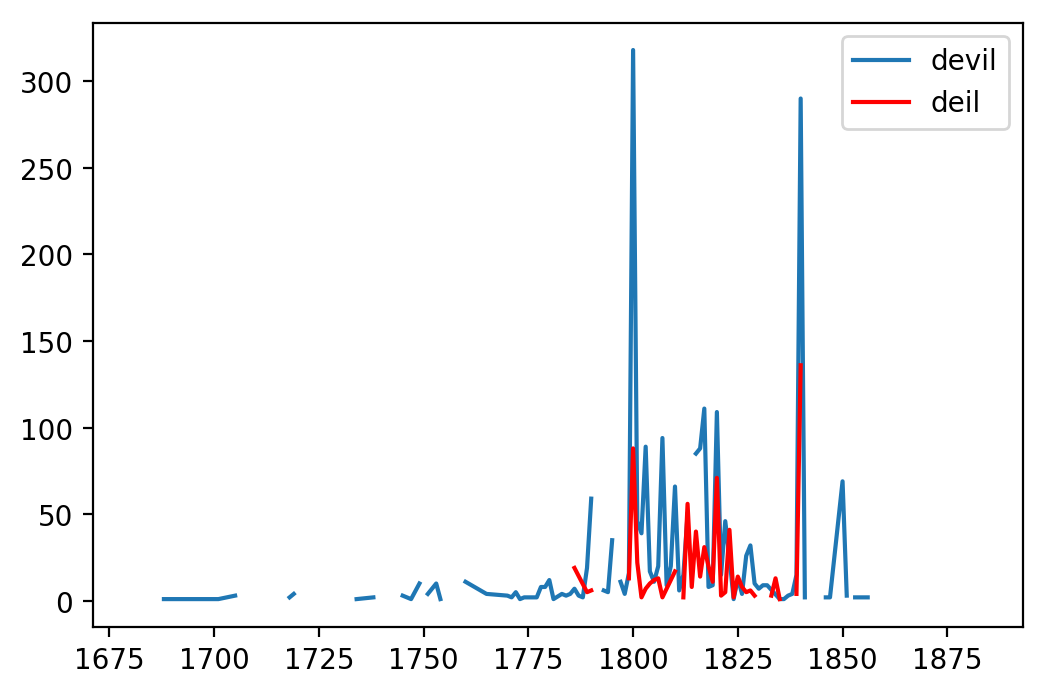

In [139]:
#x is years, y is frequency.
# blue - English Term ; red - Scots term
plot_terms(df_comparing, 'devil', 'deil')

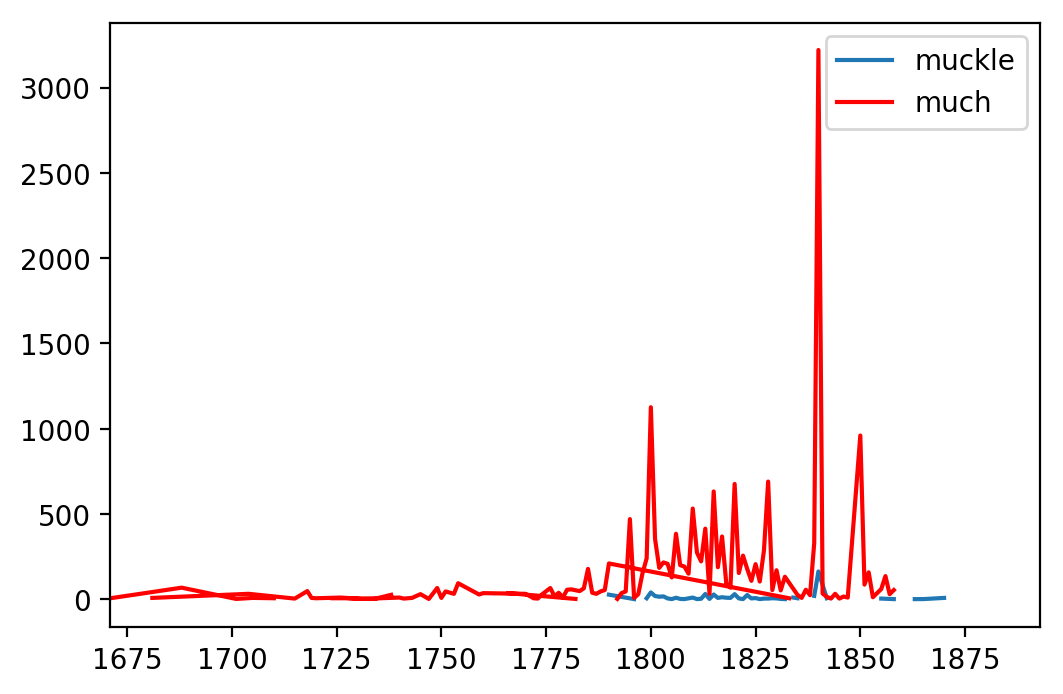

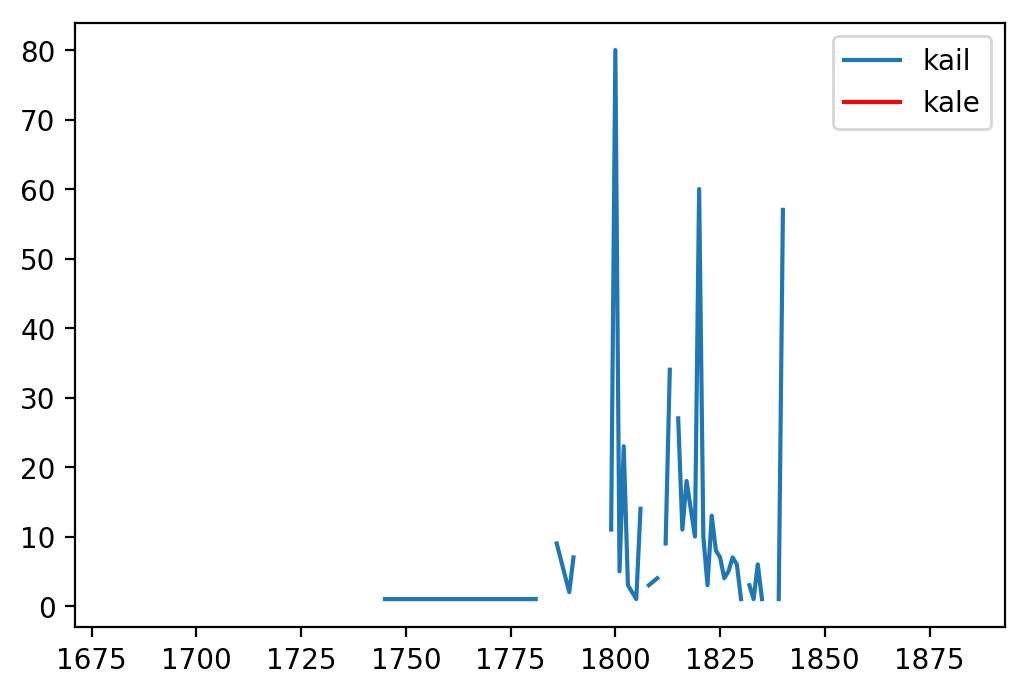

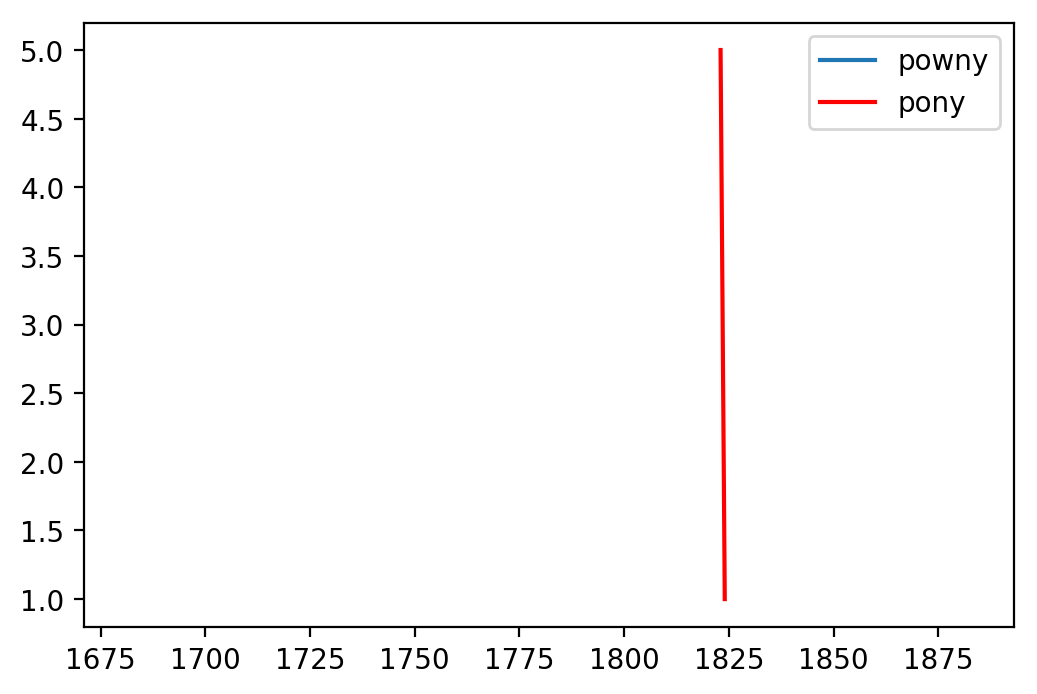

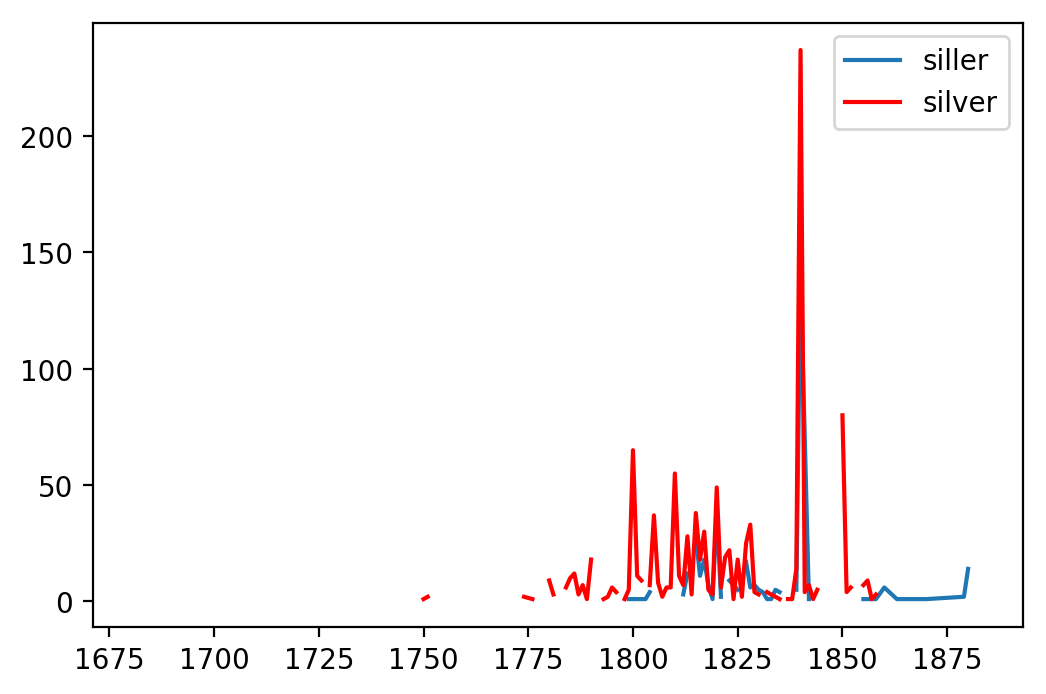

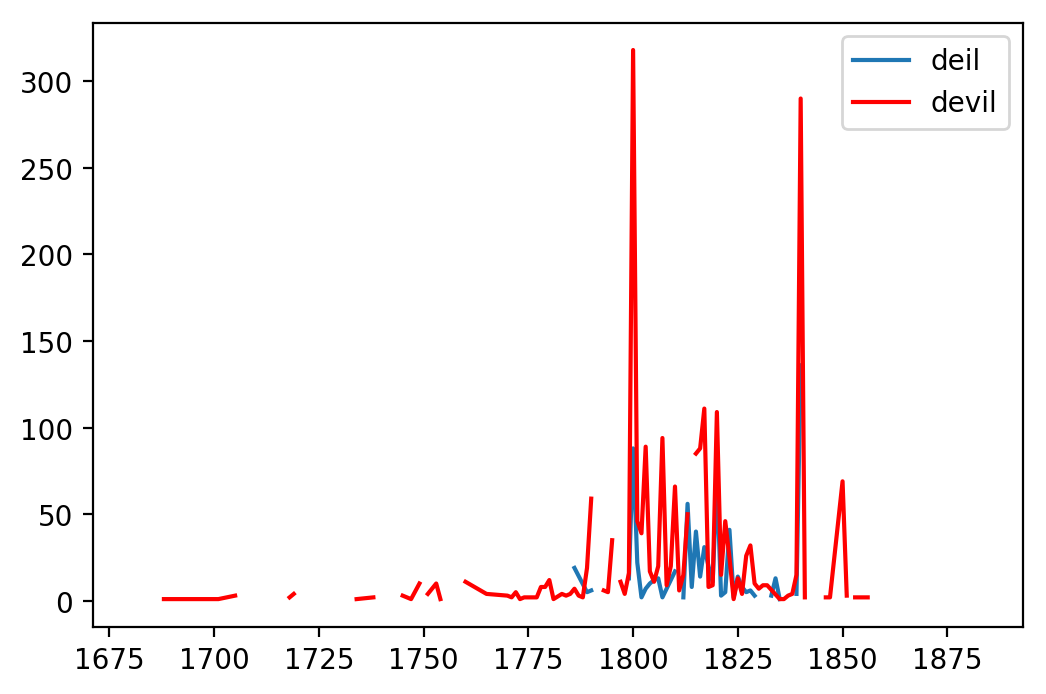

In [140]:
for i in range(0,5):
    scots_term=scots_lexicon_norm[i]
    english_term=english_lexicon_norm[i]
    plot_terms(df_comparing, scots_term, english_term)

### 4. Indicating manually equivalent terms from both lexicons. 

Lets imagine that we want to compare, these two equivalent terms: **acquent** (Scots)	and **acquaint** (English). 
We have to take their normalized versions stored in  *scots_lexicon_norm* and  *english_lexicon_norm*. 

We have to remember that we have normalized all words, from lexicons and also from ChaptBooks' pages. Which means that we have transformed all terms in lowercase and we have removed everything that is not a letter. 

So the normalized version of *acquent* is *acquent* ; and the normalized version of *acquaint* is *acquaint*.

### 4.1 Basic visualizations

In [151]:
scots_term="acquent"
print(scots_term, freq_count_norm_scots[scots_term])
df_scots[scots_term][1840]

acquent {1820: 1, 1823: 1, 1828: 1, 1840: 3, 1850: 1}


3.0

In [155]:
english_term="acquaint"
print(english_term, freq_count_norm_english[english_term])
df_english[english_term][1790]

acquaint {1794: 1, 1795: 2, 1797: 1, 1799: 2, 1800: 19, 1801: 5, 1802: 5, 1803: 3, 1804: 1, 1805: 1, 1806: 2, 1807: 1, 1808: 2, 1810: 6, 1812: 4, 1815: 3, 1816: 5, 1817: 1, 1819: 4, 1820: 8, 1821: 9, 1822: 2, 1823: 6, 1824: 1, 1825: 1, 1827: 3, 1828: 5, 1829: 2, 1832: 2, 1833: 1, 1839: 4, 1840: 27, 1842: 1, 1843: 1, 1844: 1, 1850: 10, 1851: 1, 1852: 1, 1855: 3, 1856: 1, 1858: 1, 1880: 1, 1705: 4, 1751: 1, 1753: 1, 1755: 1, 1773: 1, 1774: 5, 1780: 1, 1785: 2, 1788: 1, 1790: 3}


3.0

### 4.2 Creating a pandas dataframes with these two terms ( one in scots, and one in english). Each row contains the number of time both terms appear per year. 

In [180]:
df1= pd.DataFrame({scots_term: freq_count_norm_scots[scots_term]})
df2= pd.DataFrame({english_term: freq_count_norm_english[english_term]})
df_comparing = pd.concat([df1, df2])
df_comparing

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,acquaint,acquent
1820,NaN,1.0
1823,NaN,1.0
1828,NaN,1.0
1840,NaN,3.0
1850,NaN,1.0
1705,4.0,NaN
1751,1.0,NaN
1753,1.0,NaN
1755,1.0,NaN
1773,1.0,NaN


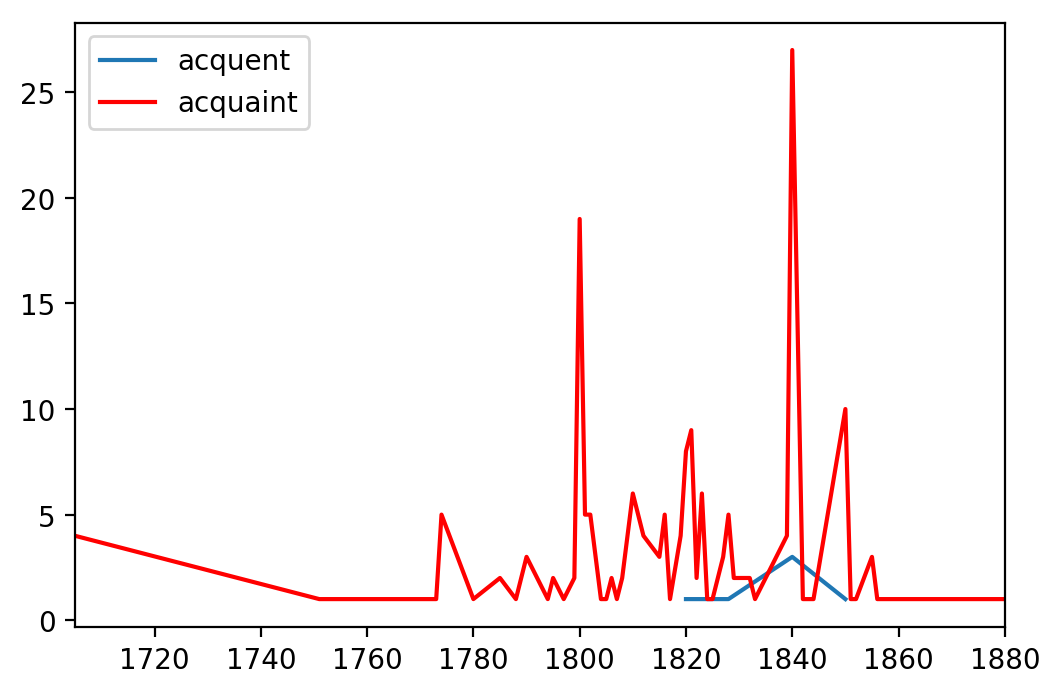

In [181]:
plot_terms(df_comparing, scots_term, english_term)